### Stock Market Prediction Using  LSTM

In [ ]:
# Data Set used is Last 1 Month named= AAPL_1.csv
# Predicted next 2 days stock price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from numpy import array

In [2]:
df=pd.read_csv('AAPL_1.csv')

In [3]:
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  1/31/2022  170.160004  175.000000  169.509995  174.779999  174.557602   
1   2/1/2022  174.009995  174.839996  172.309998  174.610001  174.387817   
2   2/2/2022  174.750000  175.880005  173.330002  175.839996  175.616257   
3   2/3/2022  174.479996  176.240005  172.119995  172.899994  172.679993   
4   2/4/2022  171.679993  174.100006  170.679993  172.389999  172.389999   

      Volume  
0  115541600  
1   86213900  
2   84914300  
3   89418100  
4   82465400

In [4]:
df1=df.reset_index()['Close']

In [5]:
df1

0     174.779999
1     174.610001
2     175.839996
3     172.899994
4     172.389999
5     171.660004
6     174.830002
7     176.279999
8     172.119995
9     168.639999
10    168.880005
11    172.789993
12    172.550003
13    168.880005
14    167.300003
15    164.320007
16    160.070007
17    162.740005
18    164.850006
19    165.119995
20    163.199997
21    166.559998
22    166.229996
23    163.169998
24    159.300003
25    157.440002
26    162.949997
27    158.520004
28    154.729996
Name: Close, dtype: float64

In [6]:
df2=df
df2=df2.drop(["Open","High","Low","Adj Close","Volume"],axis=1)
df2

Date       Close
0   1/31/2022  174.779999
1    2/1/2022  174.610001
2    2/2/2022  175.839996
3    2/3/2022  172.899994
4    2/4/2022  172.389999
5    2/7/2022  171.660004
6    2/8/2022  174.830002
7    2/9/2022  176.279999
8   2/10/2022  172.119995
9   2/11/2022  168.639999
10  2/14/2022  168.880005
11  2/15/2022  172.789993
12  2/16/2022  172.550003
13  2/17/2022  168.880005
14  2/18/2022  167.300003
15  2/22/2022  164.320007
16  2/23/2022  160.070007
17  2/24/2022  162.740005
18  2/25/2022  164.850006
19  2/28/2022  165.119995
20   3/1/2022  163.199997
21   3/2/2022  166.559998
22   3/3/2022  166.229996
23   3/4/2022  163.169998
24   3/7/2022  159.300003
25   3/8/2022  157.440002
26   3/9/2022  162.949997
27  3/10/2022  158.520004
28  3/11/2022  154.729996

In [7]:
df2['Date']=pd.to_datetime(df2['Date'],format='%Y%m%d',errors='ignore')

In [8]:
df2.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

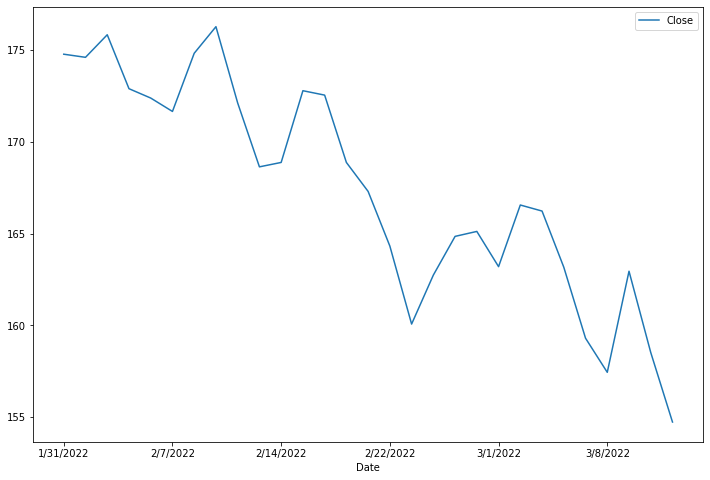

In [9]:
df2.plot(figsize=(12,8))

In [10]:
# To Normalize the data, we apply MinMax Scaler.

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.60)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [12]:
training_size,test_size

(17, 12)

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
# reshape data
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(12, 4)
(12,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(7, 4)
(7,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
## Sometimes this model is working and sometimes it is not..

model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(64,return_sequences=True))
model.add(LSTM(64))
#model.add(Dense(32))
#model.add(Dense(16))
#model.add(Dense(2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
#model=Sequential()
#model.add(LSTM(64,return_sequences=True,input_shape=(4,1)))
#model.add(LSTM(64,return_sequences=True))
#model.add(LSTM(64))
#model.add(Dense(1))
#model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 4, 64)             16896     
                                                                 
 lstm_4 (LSTM)               (None, 4, 64)             33024     
                                                                 
 lstm_5 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 83,009
Trainable params: 83,009
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,shuffle=False)

Epoch 1/100
1/1 [==============================] - 30s 30s/step - loss: 0.5842 - val_loss: 0.1275
Epoch 2/100
1/1 [==============================] - 0s 134ms/step - loss: 0.5494 - val_loss: 0.1162
Epoch 3/100
1/1 [==============================] - 0s 119ms/step - loss: 0.5154 - val_loss: 0.1050
Epoch 4/100
1/1 [==============================] - 0s 110ms/step - loss: 0.4811 - val_loss: 0.0940
Epoch 5/100
1/1 [==============================] - 0s 130ms/step - loss: 0.4459 - val_loss: 0.0828
Epoch 6/100
1/1 [==============================] - 0s 117ms/step - loss: 0.4091 - val_loss: 0.0716
Epoch 7/100
1/1 [==============================] - 0s 103ms/step - loss: 0.3701 - val_loss: 0.0605
Epoch 8/100
1/1 [==============================] - 0s 123ms/step - loss: 0.3286 - val_loss: 0.0497
Epoch 9/100
1/1 [==============================] - 0s 139ms/step - loss: 0.2846 - val_loss: 0.0398
Epoch 10/100
1/1 [==============================] - 0s 93ms/step - loss: 0.2384 - val_loss: 0.0315
Epoch 11/10

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
ytest.shape

(7,)

In [29]:
a=ytest.reshape(7,1)

In [30]:
a=scaler.inverse_transform(a)

In [31]:
#MAE, MSE, RMSE Error
print('Mean Absolute error: ', metrics.mean_absolute_error(a,test_predict))
print('Mean Squared Error: ', metrics.mean_squared_error(a,test_predict))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(a,test_predict)))

Mean Absolute error:  5.053473360491073
Mean Squared Error:  36.85712880249285
Root Mean Squared Error:  6.071007231299667


In [44]:
b = df['Adj Close'].tail(7)
df4 = pd.DataFrame(b)
df4['Predicted']=test_predict
df4.tail(7)

Adj Close   Predicted
22  166.229996  167.000732
23  163.169998  167.399155
24  159.300003  167.438843
25  157.440002  167.400085
26  162.949997  167.675507
27  158.520004  166.861740
28  154.729996  165.768250

In [33]:
len(test_data)

12

In [34]:
# i is input
x_input=test_data[8:].reshape(1,-1)
x_input.shape


(1, 4)

In [35]:
tmp=list(x_input)
tmp=tmp[0].tolist()

In [36]:
# Demonstrate prediction for next 5 days

output=[]
n_steps=4
i=0
while(i<2):
    
    if(len(tmp)>4):
        x_input=np.array(tmp[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        tmp.extend(yhat[0].tolist())
        tmp=tmp[1:]
        output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        tmp.extend(yhat[0].tolist())
        print(len(tmp))
        output.extend(yhat.tolist())
        i=i+1
    

print(output)

[0.47613648]
5
1 day input [0.38143851 0.17587042 0.         0.47613648]
1 day output [[0.49872068]]
[[0.4761364758014679], [0.4987206757068634]]


In [37]:
day_new=np.arange(1,5)
day_pred=np.arange(5,8)

In [38]:
len(df1)

29

In [39]:
pred=scaler.inverse_transform(output)
pred

array([[164.99073848],
       [165.47742806]])

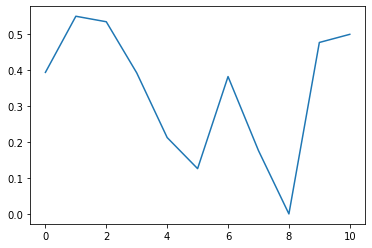

In [40]:
df3=df1.tolist()
df3.extend(output)
plt.plot(df3[20:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

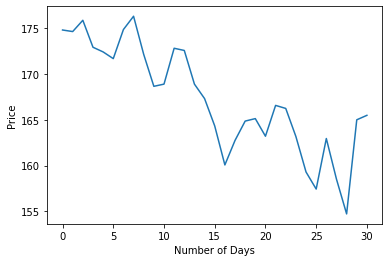

In [42]:
plt.xlabel('Number of Days')
plt.ylabel('Price')
plt.plot(df3)

In [43]:
#Prediction of next 5 days(1 week)
dt=['2022-03-14','2022-03-15']
df5 = pd.DataFrame(dt,columns=['Date'])
df5['Predicted Price'] = pred
df5

Date  Predicted Price
0  2022-03-14       164.990738
1  2022-03-15       165.477428